<a href="https://colab.research.google.com/github/GermanOmar/UPS-termoelectrica/blob/master/UPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelado del proceso de producción de energía en centrales de generación térmica considerando el perfil de funcionamiento

<a href="https://ibb.co/0cmvG7t"><img src="https://i.ibb.co/XbjMCQ8/Motor-Combustion.png" WIDTH="600" HEIGHT="250"  border="0"></a>

In [1]:
pip install lazypredict

     |████████████████████████████████| 276kB 13.9MB/s 
     |████████████████████████████████| 6.8MB 18.8MB/s 
     |████████████████████████████████| 25.9MB 110kB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 127.6MB 83kB/s 
     |████████████████████████████████| 307kB 45.5MB/s 
     |████████████████████████████████| 10.1MB 34.0MB/s 
     |████████████████████████████████| 14.5MB 214kB/s 
     |████████████████████████████████| 256kB 54.5MB/s 
     |████████████████████████████████| 1.2MB 35.3MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=0f67e521118ac65ec032590f0c962bfda7358166dae967ccaa485bcda928a6b9
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requireme

 Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


 Upload database:

In [2]:
!git clone https://github.com/GermanOmar/UPS-termoelectrica

Cloning into 'UPS-termoelectrica'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
#Experimental data
data = pd.read_table('data.txt') 
data.describe()


,EN,HFO,DO,LO,R,D
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,1415.46,81360.74,9316.59,390.68,15.53,83.86
std,609.09,38003.30,6280.35,473.59,3.76,15.00
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,938.65,49396.90,5025.30,65.78,16.19,79.32
50%,1777.72,101593.30,8042.40,249.79,16.47,88.58
75%,1827.13,109785.50,12294.20,546.51,16.65,91.34
max,2034.31,123914.70,35895.40,3234.09,17.70,97.11


<a href="https://ibb.co/qnDpxjg"><img src="https://i.ibb.co/W3Hfs5z/Energia.png" WIDTH="700" HEIGHT="225"  border="0"></a>


Setting inputs - output:

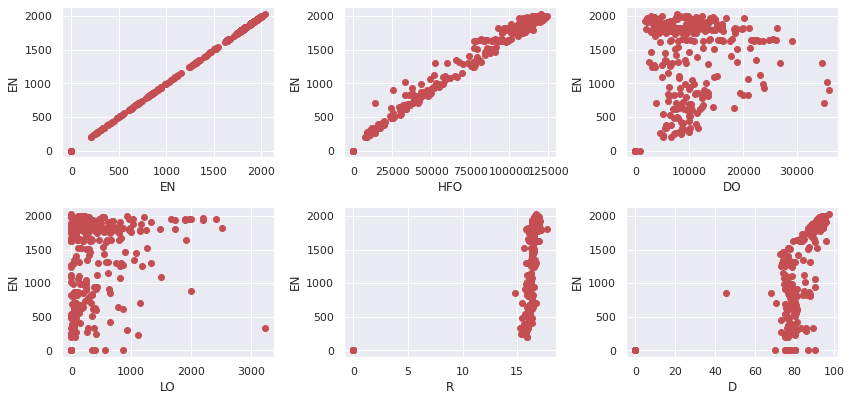

In [6]:
fields = [ 'EN', 'HFO','DO', 'LO','R', 'D']
import seaborn as sns
sns.set()

fig = plt.figure()
fig.set_size_inches((12,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['EN'], 'ro')
  plt.xlabel(field)
  plt.ylabel('EN')

plt.tight_layout()

X=data[[ 'HFO','DO', 'LO','R', 'D']]
Y=data['EN'][:,None]


#fig.tight_layout()

# Machine learning predictions

In [8]:
def normalize(X, X_mu, X_std):
  return (X - X_mu)/X_std

def denormalize(Xn, X_mu, X_std):
  return Xn*X_std + X_mu

X_std = X.std(0)
X_mu = X.mean(0)
Xn = normalize(X, X_mu, X_std)

Y_std = Y.std(0)
Y_mu = Y.mean(0)
Yn = normalize(Y, Y_mu, Y_std)

 Split data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, Yn, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 292  test samples: 73


#Results:

In [12]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 31%|███       | 13/42 [00:00<00:01, 23.61it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 71%|███████▏  | 30/42 [00:01<00:00, 23.69it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████| 42/42 [00:01<00:00, 22.24it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearSVR                                    1.00       1.00  0.03        0.02
LassoCV                                      1.00       1.00  0.03        0.06
LassoLarsCV                                  1.00       1.00  0.03        0.02
LarsCV                                       1.00       1.00  0.03        0.06
HuberRegressor                               1.00       1.00  0.03        0.02
ElasticNetCV                                 1.00       1.00  0.03        0.05
Lars                                         1.00       1.00  0.03        0.03
LinearRegression                             1.00       1.00  0.03        0.01
TransformedTargetRegressor                   1.00       1.00  0.03        0.01
OrthogonalMatchingPursuitCV                  1.00       1.00  0.03        0.03
BayesianRidge                                1.00   

###GBR 

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=2000, random_state=32, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train,y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 0.002468368072220691

R2:  0.9976109128257807
RMSE:  0.04968267376279875
MAE:  0.03197333848804611
IM:  0.05913011232712045



### GPs

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(kernel=kernel, n_restarts_optimizer=20, alpha=0.01, normalize_y=True)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

Gaussian Process
MSE train: 0.0008935037477782575
MSE test: 0.0006660649094484951
MSE train < MSE test? False

R2_train:  0.9990937227712106
R2_test:  0.9993553282631268

R2:  0.9993553282631268
RMSE:  0.02580823336550751
MAE:  0.019850651921967524
IM:  0.032565762586248936



### RFR

In [15]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=2000,max_depth=20)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION
y_pred=RFR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-----------------------------
MSE test: 0.004297319772267826

R2:  0.9958407047688771
RMSE:  0.06555394551259158
MAE:  0.041107018105516556
IM:  0.07748810519437634



### XGB

In [16]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0, n_estimators=2000, max_depth=20)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [17]:
print(xgbr)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)


In [18]:
score = xgbr.score(X_test, y_test)  
print("Training score: ", score)

Training score:  0.9968291386581165


In [19]:
print("-XGBRegressor -")
print("------------------")

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-XGBRegressor -
------------------
MSE test: 0.003276085101541822

R2:  0.9968291386581165
RMSE:  0.05723709550232106
MAE:  0.03512484784194187
IM:  0.06723015989205174



### AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=32, n_estimators=2000)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 0.009458461363303423

R2:  0.9908453325963715
RMSE:  0.0972546212953576
MAE:  0.08070048675193695
IM:  0.1267076866672817



### MLP

In [21]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=5,solver='lbfgs',learning_rate='adaptive',activation='relu',random_state=32, max_iter=2000)
#MLP = MLPRegressor(hidden_layer_sizes=(1000,1000,1000), activation='relu', solver='adam', max_iter=800)

#START TRAINING
MLP.fit(X_train,y_train)
#PREDICTION
y_pred=MLP.predict(X_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  0.9999532426066918
RMSE:  0.0972546212953576
MAE:  0.004261959128306344
IM:  0.0973479729895215



### DTR

In [22]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=26)

#START TRAINING
DT.fit(X_train,y_train)
#PREDICTION
y_pred=DT.predict(X_test)
print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  0.9940555851567682
RMSE:  0.0972546212953576
MAE:  0.04462203636430833
IM:  0.10716773563171667



### Linear SVR

In [23]:
from sklearn.svm import LinearSVR

SVR=LinearSVR( random_state=32)

#START TRAINING
SVR.fit(X_train,y_train)
#PREDICTION
y_pred=SVR.predict(X_test)
print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  0.9991876289578631
RMSE:  0.0972546212953576
MAE:  0.022052582276461712
IM:  0.09972681532603775



# Comparisson

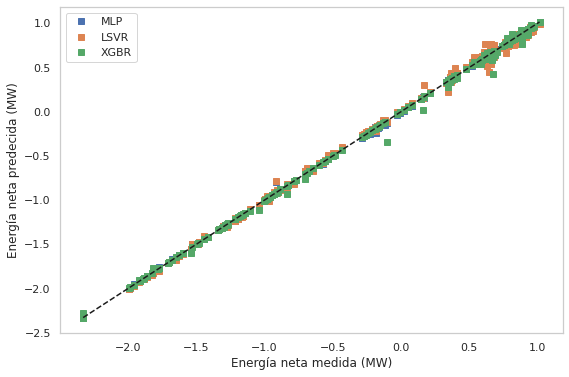

In [31]:
models = [ MLP ,  SVR, xgbr]
labels = ['MLP', 'LSVR', 'XGBR']

sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(Xn)
  plt.plot(Yn, y_pred, 's' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('Energía neta predecida (MW)')
plt.xlabel('Energía neta medida (MW)')
plt.legend()  
  

Worst

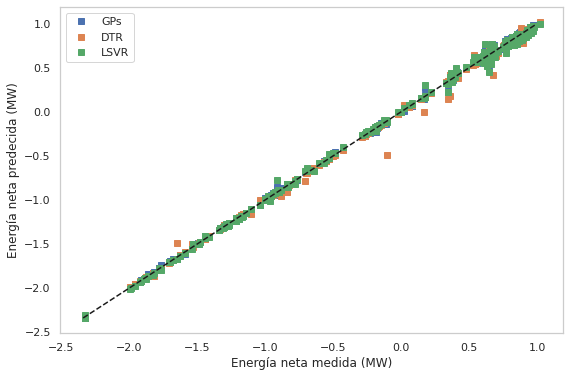

In [32]:
models = [ GP, DT, SVR  ]
labels = [ 'GPs', 'DTR', 'LSVR']

sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(Xn)
  plt.plot(Yn, y_pred, 's' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('Energía neta predecida (MW)')
plt.xlabel('Energía neta medida (MW)')
plt.legend()  

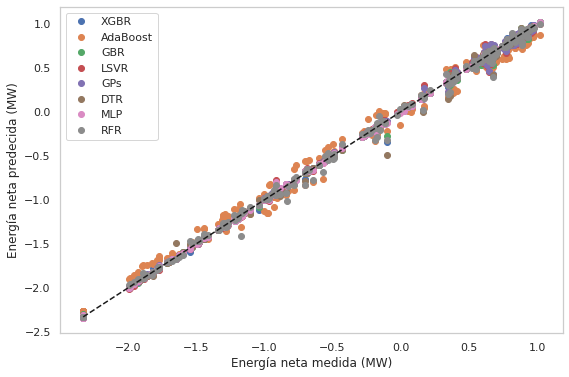

In [33]:
models = [xgbr, Ada, GBR, SVR, GP, DT, MLP, RFR ]
labels = ['XGBR', 'AdaBoost', 'GBR', 'LSVR',  'GPs', 'DTR', 'MLP', 'RFR']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(Xn)
  plt.plot(Yn, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('Energía neta predecida (MW)')
plt.xlabel('Energía neta medida (MW)')
plt.legend()

# CROSS-VALIDATION

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [xgbr, Ada, GBR, SVR, GP, DT, MLP, RFR ]
labels = ['XGBR', 'AdaBoost', 'GBR', 'LSVR',  'GPs', 'DTR', 'MLP', 'RFR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  y_star_train = mod.predict(X_train)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.9948 | 0.0050 | 0.0470 | 0.0850 
       AdaBoost | 0.9831 | 0.0161 | 0.0930 | 0.1581 
            GBR | 0.9960 | 0.0038 | 0.0397 | 0.0736 
           LSVR | 0.9987 | 0.0012 | 0.0236 | 0.0424 
            GPs | 0.9989 | 0.0010 | 0.0210 | 0.0384 
            DTR | 0.9847 | 0.0115 | 0.0684 | 0.1282 
            MLP | 0.9999 | 0.0001 | 0.0064 | 0.0135 
            RFR | 0.9913 | 0.0083 | 0.0526 | 0.1055 
--------------------------------------------------------------
